# Traitement de l'image : Filtrage II

## 1. Filtrage linéaire

### 1.1 Généralités

### 1.2 Opérateurs de Prewitt et Sobel

#### 1.2.1 Montrer que l’application de l’un de ces filtres permet d’approximer la dérivée première selon une certaine direction et la moyenne dans l’autre direction.



#### 1.2.2 Quel est le rôle de c ?



#### 1.2.3 Appliquer ces filtre sur les images onde4 et boisbruit.

In [30]:
# Visionneuse externe interactive
# %matplotlib 
#imports
import numpy as np # Tableaux
import scipy.ndimage as scp # Correlation et convolution
import matplotlib.pyplot as plt # Visionneur et tracés
from matplotlib.colors import LogNorm # echelle logarithmique
import skimage
from scipy import fftpack # Fourier 2D
from scipy import signal
plt.rcParams['figure.figsize'] = [20, 10]
# chemin d'accès à mes images 
my_path = "Images/"

onde4 = skimage.io.imread(my_path + "ondes4.jpg",as_gray=True)
bois_gray = skimage.io.imread(my_path + "bois.jpeg",as_gray=True)
boisbruit = skimage.util.random_noise(bois_gray)

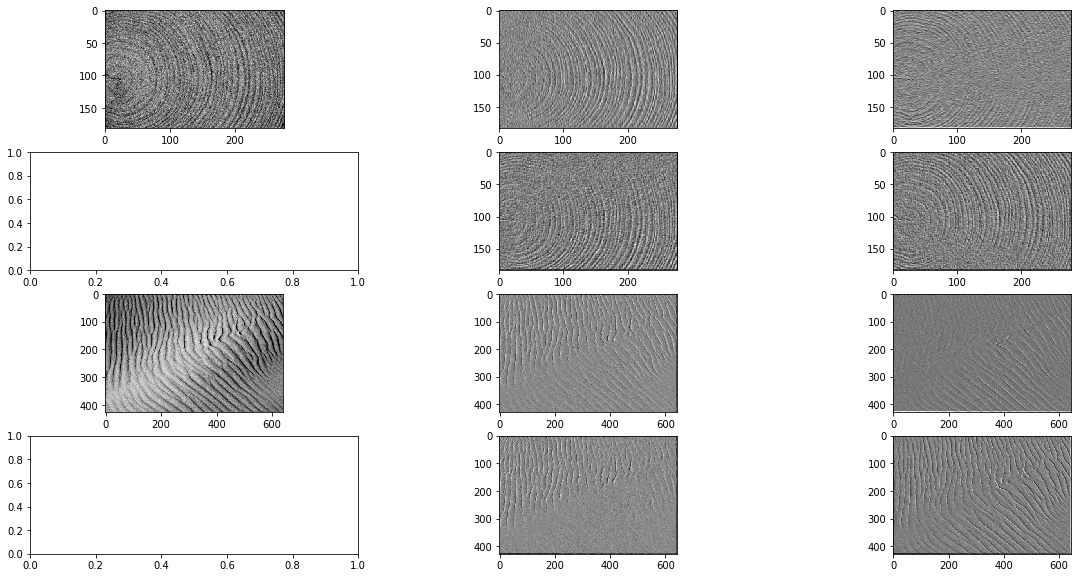

In [31]:
def getSobels(c):
    h1 = [[1, 0, -1], [c, 0, -c], [1, 0, -1]]
    h2 = [[-1, -c, -1], [0, 0, 0], [1, c, 1]]
    h3 = [[c, 1, 0],[1, 0, -1],[0, -1, -c]]
    h4 = [[0, 1, c],[-1, 0, 1],[-c, -1, 0]]
    return h1,h2,h3,h4

def convolveImage(image,h1,h2,h3,h4):
    return signal.convolve2d(image,h1),signal.convolve2d(image,h2),signal.convolve2d(image,h3),signal.convolve2d(image,h4)
    
H1, H2, H3, H4 = getSobels(2)
boisbruit_filtre1, boisbruit_filtre2, boisbruit_filtre3, boisbruit_filtre4 = convolveImage(boisbruit,H1,H2,H3,H4)
onde4_filtre1, onde4_filtre2, onde4_filtre3, onde4_filtre4 = convolveImage(onde4,H1,H2,H3,H4)

f, ax = plt.subplots(4,3)
ax[0][0].imshow(boisbruit,cmap="gray")
ax[0][1].imshow(boisbruit_filtre1,cmap="gray")
ax[0][2].imshow(boisbruit_filtre2,cmap="gray")
ax[1][1].imshow(boisbruit_filtre3,cmap="gray")
ax[1][2].imshow(boisbruit_filtre4,cmap="gray")
ax[2][0].imshow(onde4,cmap="gray")
ax[2][1].imshow(onde4_filtre1,cmap="gray")
ax[2][2].imshow(onde4_filtre2,cmap="gray")
ax[3][1].imshow(onde4_filtre3,cmap="gray")
ax[3][2].imshow(onde4_filtre4,cmap="gray")
plt.show()

#### 1.2.4 A partir de cette étude, commenter la nature de ces filtrages et les principales caractéristiques (par exemple face au bruit).

 #### 1.2.5 En appliquant la transformée de Fourier avant et après le filtre, faire le lien avec les propriétés de la dérivée vue en TD. 

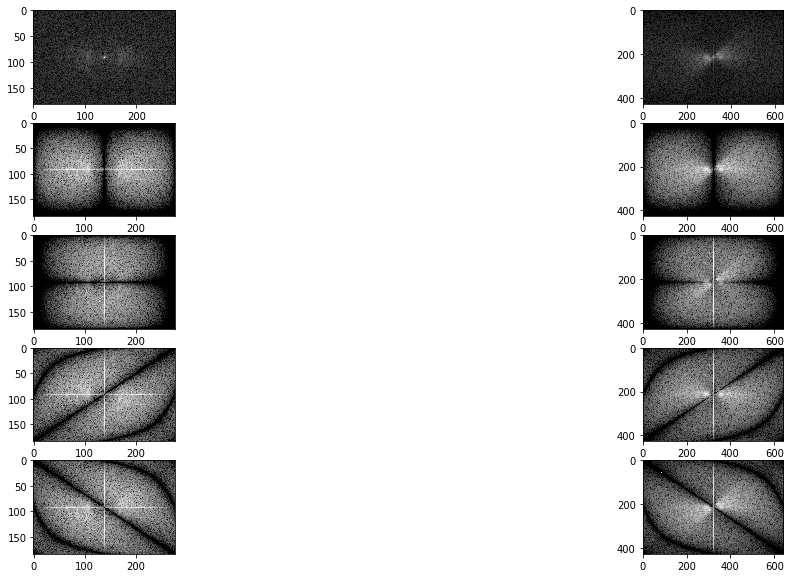

In [32]:
def calculerTFD(image):
    if image.shape != 2:
        imageGray = skimage.color.rgb2gray(image)
    else:
        imageGray = image
    TF = fftpack.fft2(imageGray)
    module = abs(TF)
    return fftpack.fftshift(module)

def calculerAllTFD(image,image1,image2,image3,image4):
    return  calculerTFD(image),calculerTFD(image1),calculerTFD(image2),calculerTFD(image3),calculerTFD(image4)

boisbruit_avant, boisbruit_apresH1, boisbruit_apresH2, boisbruit_apresH3, boisbruit_apresH4 = calculerAllTFD(boisbruit,boisbruit_filtre1,boisbruit_filtre2,boisbruit_filtre3,boisbruit_filtre4)
onde4_avant,onde4_apresH1,onde4_apresH2,onde4_apresH3,onde4_apresH4 = calculerAllTFD(onde4,onde4_filtre1,onde4_filtre2,onde4_filtre3,onde4_filtre4)

f, ax = plt.subplots(5,2)
ax[0][0].imshow(boisbruit_avant,norm=LogNorm(vmin=5),cmap="gray")
ax[1][0].imshow(boisbruit_apresH1,norm=LogNorm(vmin=5),cmap="gray")
ax[2][0].imshow(boisbruit_apresH2,norm=LogNorm(vmin=5),cmap="gray")
ax[3][0].imshow(boisbruit_apresH3,norm=LogNorm(vmin=5),cmap="gray")
ax[4][0].imshow(boisbruit_apresH4,norm=LogNorm(vmin=5),cmap="gray")
ax[0][1].imshow(onde4_avant,norm=LogNorm(vmin=5),cmap="gray")
ax[1][1].imshow(onde4_apresH1,norm=LogNorm(vmin=5),cmap="gray")
ax[2][1].imshow(onde4_apresH2,norm=LogNorm(vmin=5),cmap="gray")
ax[3][1].imshow(onde4_apresH3,norm=LogNorm(vmin=5),cmap="gray")
ax[4][1].imshow(onde4_apresH4,norm=LogNorm(vmin=5),cmap="gray")

(array([8.9080e+03, 1.7696e+04, 1.3502e+04, 6.5050e+03, 2.4600e+03,
        8.9900e+02, 6.1800e+02, 4.1300e+02, 1.3800e+02, 1.3000e+01]),
 array([0.00390221, 0.28427159, 0.56464096, 0.84501034, 1.12537972,
        1.40574909, 1.68611847, 1.96648785, 2.24685722, 2.5272266 ,
        2.80759598]),
 <a list of 10 Patch objects>)

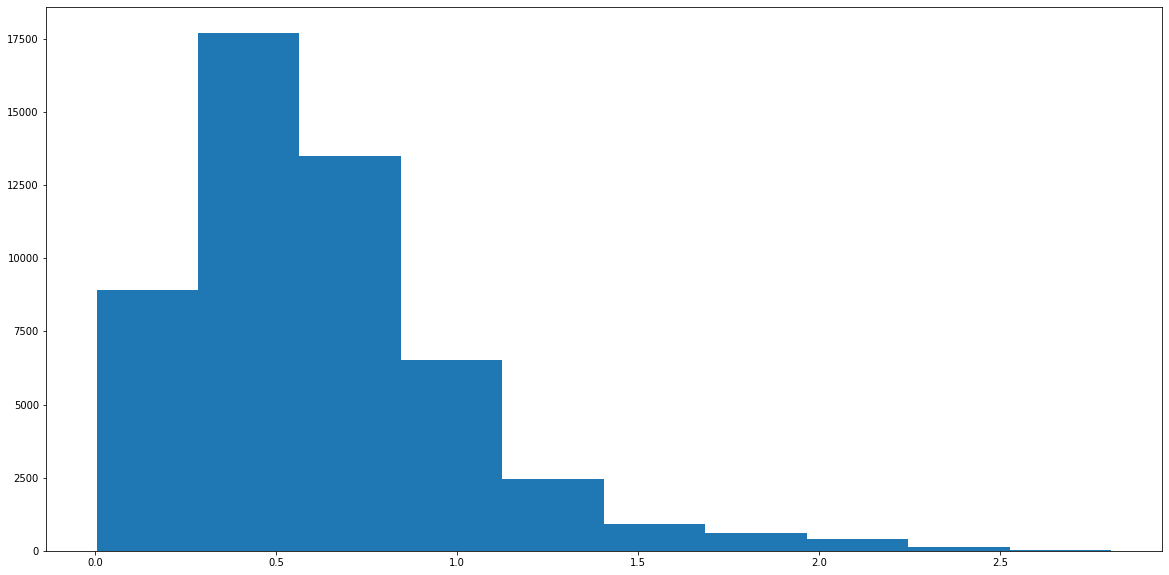

In [38]:
norme_gradient = np.sqrt(np.square(boisbruit_filtre1)+np.square(boisbruit_filtre2))
norme_gradient4 = np.sqrt(np.square(boisbruit_filtre1)+np.square(boisbruit_filtre2)+np.square(boisbruit_filtre3)+np.square(boisbruit_filtre4))
plt.hist(norme_gradient.flatten())

(array([9.3440e+03, 1.8879e+04, 1.3195e+04, 5.9120e+03, 1.9640e+03,
        7.6700e+02, 6.2500e+02, 3.6200e+02, 9.8000e+01, 6.0000e+00]),
 array([0.01235779, 0.42733157, 0.84230535, 1.25727912, 1.6722529 ,
        2.08722668, 2.50220046, 2.91717423, 3.33214801, 3.74712179,
        4.16209557]),
 <a list of 10 Patch objects>)

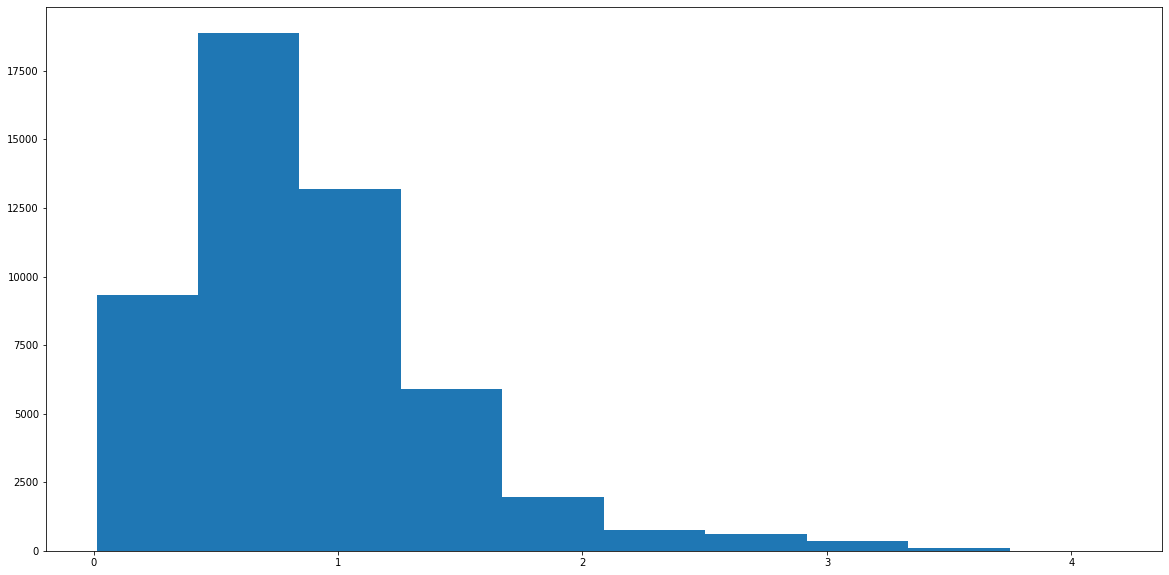

In [39]:
plt.hist(norme_gradient4.flatten())

## 2 Filtrage non-linéaire

### 2.2 Filtre de Pérona-Malik

#### 2.2.1 Mettre en oeuvre le modèle de Perona et Malik, et tester sur les images ondes 4 et 5.

In [ ]:
def PeronaMalik(image,nbIterations,deltaT,kappa):
    
    for i in range(nbIterations):
        